In [ ]:
from datetime import datetime
import pandas as pd
import time
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [ ]:
# url link from - https://www.redfin.com/news/data-center/
url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'

# start time to read file
startTime = time.time()
df = pd.read_csv(url, compression='gzip', sep='\t', on_bad_lines='skip')
# end time 
executionTime = (time.time() - startTime)
print('Execution time in minutes: ' + str(round(executionTime / 60, 2)))
print('Num of rows:', len(df))
print('Num of cols:', len(df.columns))
df.head()

In [3]:
# filter on state code
state_code = 'IL'
df_filter = df.loc[df['state_code'] == state_code]
print('Num of rows:', len(df_filter))
df_filter.head(1)

Num of rows: 298442


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
6,2020-05-01,2020-07-31,90,zip code,2,25820,f,Zip Code: 60091,NaN,Illinois,IL,Single Family Residential,6,826000.0,0.065806,0.090429,809000.0,-0.000556,0.078667,309.425495,0.073768,0.094513,321.888148,0.005252,0.097025,104.0,0.223529,-0.257143,49.0,-0.02,1.041667,166.0,0.238806,0.31746,102.0,-0.105263,-0.378049,NaN,NaN,NaN,38.5,6.5,-27.0,0.961307,0.000185,0.003582,0.048077,0.001018,-0.001923,NaN,NaN,NaN,0.44898,-0.05102,0.365646,"Chicago, IL",16984,2022-10-16 14:38:47


In [4]:
df_filter.describe()

,period_duration,region_type_id,table_id,city,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region_metro_code
count,298442.0,298442.0,298442.000000,0.0,298442.000000,2.984420e+05,284045.000000,260672.000000,2.739110e+05,259015.000000,241799.000000,291589.000000,277822.000000,255484.000000,269293.000000,255023.000000,238586.000000,298442.000000,284045.000000,260672.000000,195193.000000,168119.000000,164493.000000,274090.000000,259195.000000,241952.000000,276729.000000,263346.000000,246245.000000,0.0,0.0,0.0,297250.000000,282830.000000,259453.000000,297842.000000,283434.000000,259996.000000,298442.000000,284045.000000,260672.000000,0.0,0.0,0.0,209287.000000,178897.000000,174073.000000,298442.000000
mean,90.0,2.0,26379.250250,NaN,4.046857,1.871403e+05,0.334873,4.531813,2.055791e+05,0.034516,0.126110,114.101981,0.626720,3.378910,121.085134,0.083200,0.194861,32.302183,0.069488,0.252738,12.822463,0.204951,0.296733,43.443712,0.057480,0.181234,42.559920,0.034822,0.078452,NaN,NaN,NaN,149.416982,-0.877508,-12.124872,0.957265,0.000399,0.005159,0.173917,0.001606,0.022728,NaN,NaN,NaN,0.323757,-0.001352,0.002719,24871.943667
std,0.0,0.0,1338.366663,NaN,4.481255,1.695066e+05,82.594168,551.394940,1.829378e+05,0.476791,0.818978,1591.662005,247.445438,470.853480,1083.176649,24.693014,25.335535,50.216257,0.427934,1.552230,16.967681,0.873021,1.131171,65.454351,0.420087,1.291265,63.536613,0.349255,0.813529,NaN,NaN,NaN,434.788701,265.791602,449.417742,0.059810,0.035258,0.064943,0.211242,0.124596,0.226418,NaN,NaN,NaN,0.298920,0.315447,0.344009,10208.908863
min,90.0,2.0,25746.000000,NaN,-1.000000,1.000000e+00,-0.999990,-0.999988,2.250000e+02,-0.992009,-0.992148,0.000165,-0.999998,-0.999993,0.008783,-0.999807,-0.999664,1.000000,-0.928571,-0.952381,1.000000,-0.947368,-0.960000,1.000000,-0.941176,-0.958333,1.000000,-0.928571,-0.956522,NaN,NaN,NaN,1.000000,-7955.000000,-8064.000000,0.500000,-0.970694,-1.234457,0.000000,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,-1.142857,-1.750000,14010.000000
25%,90.0,2.0,25946.000000,NaN,-1.000000,9.250000e+04,-0.037815,-0.071730,1.050000e+05,-0.041488,-0.062918,64.055404,-0.026767,-0.046600,72.433775,-0.027173,-0.039740,2.000000,-0.125000,-0.181818,2.000000,-0.275862,-0.235294,4.000000,-0.152174,-0.194175,5.000000,-0.107944,-0.302326,NaN,NaN,NaN,34.000000,-8.000000,-35.000000,0.941431,-0.005988,-0.012107,0.000000,-0.017029,-0.038900,NaN,NaN,NaN,0.000000,-0.126615,-0.139803,16984.000000
50%,90.0,2.0,26118.000000,NaN,4.000000,1.495000e+05,0.000000,0.060976,1.619500e+05,0.000000,0.050017,94.086022,0.000000,0.052402,102.606813,0.000000,0.043273,9.000000,0.000000,0.000000,6.000000,0.000000,0.000000,14.000000,0.000000,0.000000,14.000000,0.000000,-0.063830,NaN,NaN,NaN,59.500000,0.000000,-5.500000,0.965760,0.000000,0.004569,0.120690,0.000000,0.000000,NaN,NaN,NaN,0.307692,0.000000,0.000000,16984.000000
75%,90.0,2.0,26555.000000,NaN,6.000000,2.305000e+05,0.051395,0.215385,2.499000e+05,0.052216,0.178999,134.285714,0.038441,0.172573,144.345238,0.036720,0.141741,41.000000,0.159091,0.360000,17.000000,0.400000,0.500000,57.000000,0.169811,0.266667,55.000000,0.100000,0.200000,NaN,NaN,NaN,112.000000,7.500000,20.500000,0.983299,0.006775,0.023407,0.256881,0.020024,0.090611,NaN,NaN,NaN,0.500000,0.121622,0.166667,36837.000000
max

In [5]:
# get zip code county data
geo_data_url = 'https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv'
df_geo = pd.read_csv(geo_data_url)
print('Num of rows:', len(df_geo))
print('Num of columns:', len(df_geo.columns))
df_geo.head()

Num of rows: 33103
Num of columns: 6


,state_fips,state,state_abbr,zipcode,county,city
0,1,Alabama,AL,35004,St. Clair,Acmar
1,1,Alabama,AL,35005,Jefferson,Adamsville
2,1,Alabama,AL,35006,Jefferson,Adger
3,1,Alabama,AL,35007,Shelby,Keystone
4,1,Alabama,AL,35010,Tallapoosa,New site


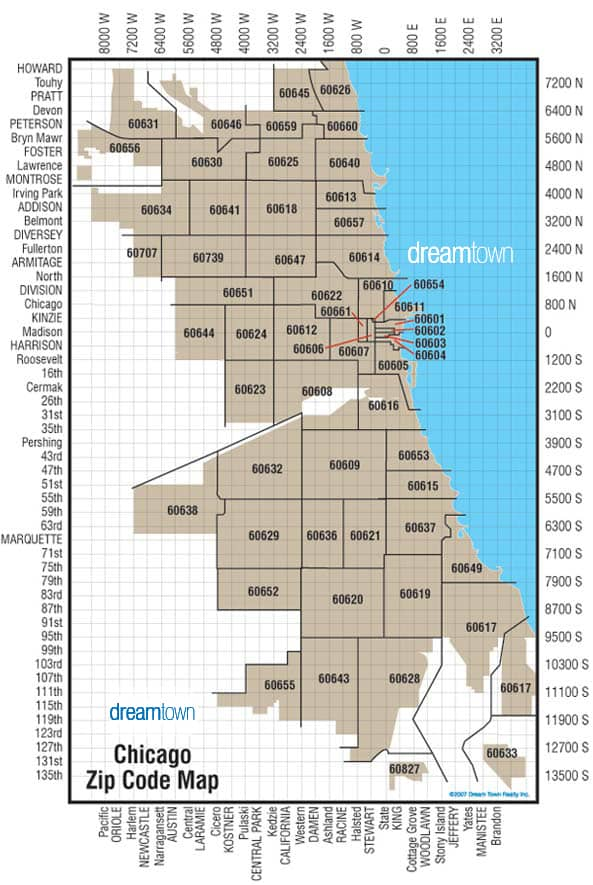

In [6]:
from IPython.display import Image, display
display(Image('https://www.dreamtown.com/assets/img/maps/chicago-zipcode-map.jpg'))

In [7]:
# filter on single county
df_geo_county = df_geo.loc[(df_geo['state_abbr'] == 'IL') &
                           (df_geo['county'].isin(['Cook']))]
# create feature to check if zip code is valid
df_geo_county['valid_zip_code'] = df_geo_county.apply(lambda x: x['zipcode'].isnumeric(), axis=1)
print('Dataset:')
print(df_geo_county.groupby(['valid_zip_code', 'county'])['zipcode'].count())
print(' ')
print('Invalid zip codes:', df_geo_county.loc[df_geo_county['valid_zip_code'] == False]['zipcode'].unique())

Dataset:
valid_zip_code  county
False           Cook        5
True            Cook      157
Name: zipcode, dtype: int64
 
Invalid zip codes: ['600HH' '604HH' '605HH' '606HH' '608HH']


In [8]:
# filter on only valid zip codes
df_geo_county_valid = df_geo_county.loc[df_geo_county['valid_zip_code'] == True]
print('Num of VALID zip codes:', len(df_geo_county_valid))
df_geo_county_valid.head(1)

Num of VALID zip codes: 157


,state_fips,state,state_abbr,zipcode,county,city,valid_zip_code
6626,17,Illinois,IL,60004,Cook,Arlington height,True


In [9]:
# get zip code from region field
df_filter['zipcode'] = df_filter.apply(lambda x: x['region'].split(':')[1].strip(), axis=1)
# merge market data and geo zip codes
df_merge = pd.merge(
    df_filter,
    df_geo_county_valid[['zipcode', 'city', 'county']],
    how='inner', # only return zip codes from BOTH tables
    on=['zipcode'] # field to join on
)
print('Num of rows:', len(df_merge))
df_merge.head()

Num of rows: 82607


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city_x,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city_y,county
0,2020-05-01,2020-07-31,90,zip code,2,25820,f,Zip Code: 60091,NaN,Illinois,IL,Single Family Residential,6,826000.0,0.065806,0.090429,809000.0,-0.000556,0.078667,309.425495,0.073768,0.094513,321.888148,0.005252,0.097025,104.0,0.223529,-0.257143,49.0,-0.020000,1.041667,166.0,0.238806,0.317460,102.0,-0.105263,-0.378049,NaN,NaN,NaN,38.5,6.5,-27.0,0.961307,0.000185,0.003582,0.048077,0.001018,-0.001923,NaN,NaN,NaN,0.448980,-0.051020,0.365646,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook
1,2017-11-01,2018-01-31,90,zip code,2,25820,f,Zip Code: 60091,NaN,Illinois,IL,Townhouse,13,310000.0,0.148148,-0.240196,519250.0,0.487822,0.407182,219.983553,0.028846,-0.006839,266.245987,0.162321,0.089683,7.0,-0.125000,1.333333,1.0,-0.500000,NaN,8.0,0.600000,0.600000,9.0,0.500000,0.285714,NaN,NaN,NaN,35.0,-17.5,-142.0,0.975603,0.013445,-0.000813,0.285714,0.035714,0.285714,NaN,NaN,NaN,1.000000,0.500000,NaN,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook
2,2020-01-01,2020-03-31,90,zip code,2,25820,f,Zip Code: 60091,NaN,Illinois,IL,All Residential,-1,580000.0,0.035714,0.019780,725000.0,0.037196,0.000000,258.328550,0.007481,0.016484,282.906492,0.007793,-0.007893,78.0,0.026316,0.258065,48.0,0.297297,0.170732,201.0,0.225610,-0.086364,143.0,-0.046667,-0.315789,NaN,NaN,NaN,67.0,-47.0,-46.0,0.958038,0.002239,0.005938,0.102564,-0.002699,0.038048,NaN,NaN,NaN,0.354167,-0.159347,0.085874,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook
3,2013-06-01,2013-08-31,90,zip code,2,25820,f,Zip Code: 60091,NaN,Illinois,IL,All Residential,-1,605000.0,0.008333,0.012552,530000.0,-0.084629,-0.057694,294.628268,0.031601,0.091808,293.283008,-0.032663,0.043436,194.0,0.048649,0.141176,40.0,-0.166667,0.212121,173.0,-0.176190,0.094937,153.0,-0.100000,0.085106,NaN,NaN,NaN,39.0,-4.0,-21.0,0.963188,-0.000757,0.017502,0.144330,-0.028643,0.067859,NaN,NaN,NaN,0.350000,0.120833,0.077273,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook
4,2014-11-01,2015-01-31,90,zip code,2,25820,f,Zip Code: 60091,NaN,Illinois,IL,Townhouse,13,344100.0,0.000000,0.262752,454000.0,0.083532,-0.134414,209.205021,0.000000,0.111512,238.209729,0.046381,0.014093,3.0,0.000000,-0.500000,2.0,NaN,1.000000,2.0,-0.333333,0.000000,5.0,-0.285714,-0.375000,NaN,NaN,NaN,122.0,-8.0,70.5,0.954308,-0.005481,-0.004415,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook


In [10]:
df_merge.loc[(df_merge['zipcode'] == '33510') & 
             (df_merge['property_type'] == 'Single Family Residential')]\
  .sort_values(by=['period_begin']).tail(2)\
  [['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy']]

,period_begin,median_dom,median_dom_mom,median_dom_yoy


In [11]:
# test to correct the error
df_test = df_merge.copy()
df_test['median_dom_mom_correction'] = df_test.sort_values(by=['period_begin'])['median_dom'].pct_change()
df_test.loc[(df_test['zipcode'] == '33510') & 
             (df_test['property_type'] == 'Single Family Residential')]\
  .sort_values(by=['period_begin']).tail(2)\
  [['period_begin', 'median_dom', 'median_dom_mom', 'median_dom_yoy', 'median_dom_mom_correction']]

,period_begin,median_dom,median_dom_mom,median_dom_yoy,median_dom_mom_correction


In [12]:
# add features
df_features = df_merge.copy()
print('Max begin date:', df_features['period_begin'].max())
print('Max end date:', df_features['period_end'].max())
max_end_date = df_features['period_end'].max()

# 1) flag for most recent date
df_features['latest_period'] = df_features.apply(
    lambda x: True if x['period_end'] == max_end_date else False, axis=1)

# 2) remove Redfin city and keep Geo city
df_features = df_features.drop(columns=['city_x'])
df_features = df_features.rename(columns={'city_y': 'city'})

# 3) fix median days on market (bad data)
df_features['median_dom_mom'] = df_features.sort_values(by=['period_begin'])['median_dom'].pct_change()

# view first 5 rows
df_features.head()

Max begin date: 2022-07-01
Max end date: 2022-09-30


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,county,latest_period
0,2020-05-01,2020-07-31,90,zip code,2,25820,f,Zip Code: 60091,Illinois,IL,Single Family Residential,6,826000.0,0.065806,0.090429,809000.0,-0.000556,0.078667,309.425495,0.073768,0.094513,321.888148,0.005252,0.097025,104.0,0.223529,-0.257143,49.0,-0.020000,1.041667,166.0,0.238806,0.317460,102.0,-0.105263,-0.378049,NaN,NaN,NaN,38.5,-0.552326,-27.0,0.961307,0.000185,0.003582,0.048077,0.001018,-0.001923,NaN,NaN,NaN,0.448980,-0.051020,0.365646,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook,False
1,2017-11-01,2018-01-31,90,zip code,2,25820,f,Zip Code: 60091,Illinois,IL,Townhouse,13,310000.0,0.148148,-0.240196,519250.0,0.487822,0.407182,219.983553,0.028846,-0.006839,266.245987,0.162321,0.089683,7.0,-0.125000,1.333333,1.0,-0.500000,NaN,8.0,0.600000,0.600000,9.0,0.500000,0.285714,NaN,NaN,NaN,35.0,1.333333,-142.0,0.975603,0.013445,-0.000813,0.285714,0.035714,0.285714,NaN,NaN,NaN,1.000000,0.500000,NaN,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook,False
2,2020-01-01,2020-03-31,90,zip code,2,25820,f,Zip Code: 60091,Illinois,IL,All Residential,-1,580000.0,0.035714,0.019780,725000.0,0.037196,0.000000,258.328550,0.007481,0.016484,282.906492,0.007793,-0.007893,78.0,0.026316,0.258065,48.0,0.297297,0.170732,201.0,0.225610,-0.086364,143.0,-0.046667,-0.315789,NaN,NaN,NaN,67.0,0.970588,-46.0,0.958038,0.002239,0.005938,0.102564,-0.002699,0.038048,NaN,NaN,NaN,0.354167,-0.159347,0.085874,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook,False
3,2013-06-01,2013-08-31,90,zip code,2,25820,f,Zip Code: 60091,Illinois,IL,All Residential,-1,605000.0,0.008333,0.012552,530000.0,-0.084629,-0.057694,294.628268,0.031601,0.091808,293.283008,-0.032663,0.043436,194.0,0.048649,0.141176,40.0,-0.166667,0.212121,173.0,-0.176190,0.094937,153.0,-0.100000,0.085106,NaN,NaN,NaN,39.0,0.054054,-21.0,0.963188,-0.000757,0.017502,0.144330,-0.028643,0.067859,NaN,NaN,NaN,0.350000,0.120833,0.077273,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook,False
4,2014-11-01,2015-01-31,90,zip code,2,25820,f,Zip Code: 60091,Illinois,IL,Townhouse,13,344100.0,0.000000,0.262752,454000.0,0.083532,-0.134414,209.205021,0.000000,0.111512,238.209729,0.046381,0.014093,3.0,0.000000,-0.500000,2.0,NaN,1.000000,2.0,-0.333333,0.000000,5.0,-0.285714,-0.375000,NaN,NaN,NaN,122.0,2.297297,70.5,0.954308,-0.005481,-0.004415,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,"Chicago, IL",16984,2022-10-16 14:38:47,60091,Wilmette,Cook,False


In [13]:
date_str = datetime.today().strftime('%Y-%m')
print('Current year/month:', date_str)

Current year/month: 2022-11


In [14]:
# download file
df_features.to_csv('zip_realtor_{0}_{1}.csv'.format(state_code, date_str), index=False)
files.download('zip_realtor_{0}_{1}.csv'.format(state_code, date_str))

NameError: name 'files' is not defined